In [1]:
docs = ["ca cfaehl chris depression faehl obesity reasonable towards towards trend trend writes", 
        "cfaehl chris clark ednclark faehl jeffrey kraken writes writes",
        "article chris concerning herringshaw newsgroup personally proposed split tdawson writes",
        "anyone article chris herringshaw know repeat request sorry tdawson writes",
        "article behanna behanna chris get kryptonite money writes",
        "article behanna behanna chris dos ftpnuz says",
        "article article chris chriss silvester wharfie wrat writes",
        "article chris crichmon lines organization richmond seattle university washington writes",
        "apps article chris chudel hudel ps right run servers writes",
        "article behanna behanna chris lmcstst stamos stamos writes",
        "article cfaehl chris darice faehl fred rice writes",
        "brother chris designed egerter graphics graphics library programming toolkit truly wgt wordup",
        "also article best cab chris cosine effect got lines manual writes",
        "article article behanna behanna chris tcora writes",
        "attempt chris close dave dfuller fuller nice verrry writes",
        "article behanna behanna chris completely different eventual outcome tack writes",
        "article chris distribution lines rec sci smith writes",
        "cah chris huey jamie jamie managers people recommended scuglia thanks workspace writes wrote",
        "article best cab chris expert said something ups writes",
        "ago best cab chris gadget got idea least little new wrote years"]

docs_set = [set(doc.split()) for doc in docs] 

In [2]:
import math

def count_PPMI(docs, w1, w2):
    w1_count = 0
    w2_count = 0
    w1_and_w2_count = 0
    for doc in docs:
        if w1 in doc:
            w1_count += 1
        if w2 in doc:
            w2_count += 1
        if w1 in doc and w2 in doc:
            w1_and_w2_count += 1
                
    return max(0, math.log2( (len(docs) * w1_and_w2_count) / (w1_count * w2_count) ))   
            

Введите значение PPMI
 для термов cab и best:

In [4]:
print("%.3f" % count_PPMI(docs_set, "cab", "best"))

2.737


Введите значение PPMI
 для термов article и cab:

In [5]:
print("%.3f" % count_PPMI(docs_set, "cab", "article"))

0.000


Введите значение PPMI
 для термов article и lines:

In [6]:
print("%.3f" % count_PPMI(docs_set, "lines", "article"))

0.515


In [8]:
import numpy as np
from matplotlib import pyplot as plt
import cv2
import pywt


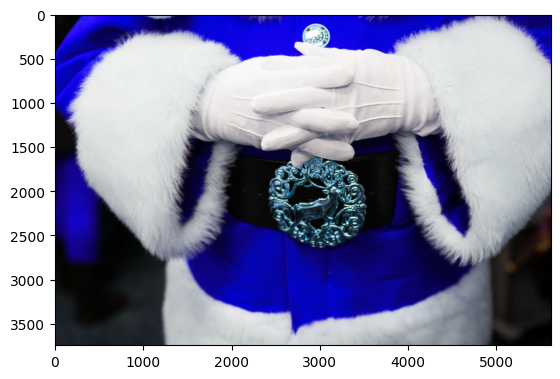

In [10]:
image = cv2.imread(r"image_processing\data\Exam\1.jpg", cv2.COLOR_BGR2RGB)
plt.imshow(image)

2. Сожмите изображение (далее сжатое изображение) до ширины 2808, соблюдая пропорции исходного изображения. Важно:коэффициент отношения сторон при вычислениях не округляйте. Если высота не окажется целой, округлите значение до целого в меньшую сторону. Используйте cv2.resize() с параметром interpolation = cv2.INTER_AREA.

1.5
1872


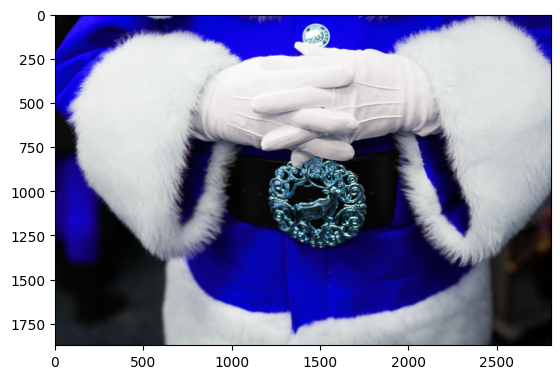

In [18]:
koeff = image.shape[1] / image.shape[0]
new_w = 2808
resized_image = cv2.resize(image, (new_w, int(new_w / koeff)), interpolation = cv2.INTER_AREA)
plt.imshow(resized_image)
print(koeff)
print(resized_image.shape[0])

3. Постройте гистограмму сжатого изображения в палитре RGB. Сравните оценку плотностей распределения интенсивностей по каналам R, G и B.

Введите наибольшее значение плотности среди трех каналов (результат введите с точностью до 4 знаков после запятой):

0.0514


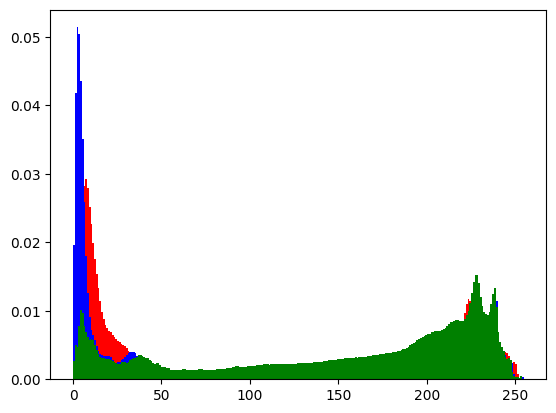

In [21]:
colors = ["red", "blue", "green"]
max_p = 0
for i in range(resized_image.shape[2]):
    hist = plt.hist(resized_image[:, :, i].ravel(), bins=256, color=colors[i], density=True)
    max_p = max(max_p, hist[0].max())
print("%.4f" % max_p)  

4. Выполните линейную нормировку и растяжение на диапазон 0−255
 гистограммы по каналам R, G и B сжатого изображения.

Определите интенсивность каналов R, G, B для пикселя, находящегося на пересечении 955
 строки и 1435
 столбца матричного представления изображения.

In [23]:
norm_image = resized_image.copy()
for i in range(norm_image.shape[2]):
    norm_image[:, :, i] = (norm_image[:, :, i] - norm_image[:, :, i].min()) / (norm_image[:, :, i].max() - norm_image[:, :, i].min()) * 255
norm_image[955, 1435, :]

array([ 6, 12, 12], dtype=uint8)

5. Выполните вейвлет-преобразование Хаара для изображения полученного после шага 4.

In [27]:
A, _ = pywt.dwt2(cv2.cvtColor(norm_image, cv2.COLOR_BGR2GRAY), "haar")

6. Выполните повторное вейвлет-преобразование Хаара для набора cA шага 5.
7. Обнулите коэффициенты меньшие по модулю значения threshold = 110 набора cA1.

In [28]:
c = pywt.dwt2(A, "haar")
zeros = 0
for i in range(c[0].shape[0]):
    c[0][i][c[0][i] < 110] = 0
    zeros += len(c[0][i][c[0][i] < 110])
zeros

56148